<center>
    
---
# <font size = 7> **Loan Approval Prediction** </font>
---
    
</center>


# <font color = "brown" size = 6> **Process Flow of Project:** </font>


1. Problem Statement
2. Features in Dataset
3. Data Collection
4. Data Cleaning and Data Preprocessing
5. Exploratory Data Analysis (EDA)
6. Data Transformation 
7. Model Buidling & Evaluation
8. Selection of Best Model & Hyperparameter Tuninng
9. Generating Pickle file

# <font color = "brown" size = 6> **Problem Statments:** </font>
**Loans** are the major requirement of the modern world. By this only, Banks get a major part of the total profit. It is beneficial for a students to manage their education and living expenses, and for people to buy any kind of luxury like houses, cars, etc. But when it comes to deciding whether the applicant's profile is relevent to be granted with loan or not. Banks have to look after many aspects. I going to develop one such model that can predict whether a person will get his/her loan approved or not by using some of the background information of the applicant like the applicant's gender, marital status, income, credit history, etc.

# <font color ="brown" size = 6> **Features in Dataset:** </font>
>**Loan_ID** : A unique identifier for each loan application. It doesn't contribute to the decision making process but can be useful for record keeping.

>**Gender**: Gender of the applicant (Female, Male)

>**Married** : The marital status of applicant (Yes- Married and No- Not Married).

>**Dependents**: Number of peoples depends on Applicant (0 to 4).

>**Education** : Educational background of applicant (Graduate and Not Graduate).

>**Self_Employed** : Salf_Employed individuals may face different income patterns compared to salaried individuals (Yes or No).

>**Applicant Income**: Higher income generally indicates a better ability to repay a loan. However extremely high or low income might be red flag.

>**Coapplicant Income** : The income of coapplicant can suppliment the houshold income, affecting the overall repayment capacity.

>**Loan_Amount** : The amount of the loan applied for is crucial. Lenders will assess whether the requedted loan amount aligns with the applicant's income and financial situation.

>**Loan_Amount_Term** : The term of the loan affects monthly repayment amounts. Shorter terms might indicate a quicker repayment ability, while longer term might associated  with the higher overall interest payments.

>**Credit_History** : This is likely one of the most Important factors. A good credit history (1.0) is generally associated with a higher likelihood of loan approval (1.0, 0.0)

>**Property_Area** : The location of property can influence loan approval. Lenders may have specific criteria for different regions (Rural, Urban, Semiurban).

>**Loan_Status** : Indicating whether the loan was approved or not. It is a Target variable.

In [1]:
# Importing necessary libraries.

import pandas as pd              # for data manipulation and analysis.
import numpy as np               # for numerical operations.
import matplotlib.pyplot as plt  # for plotting data and visualizations.
import seaborn as sns            # for statistical data visualization.
import warnings                  # to ignored the unnecessary warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<font color ="brown" size = 6> **Data Collection:** </font>

In [2]:
cr = pd.read_csv(r"C:\Users\dell\OneDrive\Documents\IMARTICUS LEARNING\python data sets\CreditRisk.csv") 
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking the numbers of rows and columns

In [3]:
cr.shape

(981, 13)

In [4]:
cr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#getting all the information of dataset using info command
#info command gives
  #1 No of rows
  #2 No of columns
  #3 No of float,int,object columns
  #4 Datatype of all the columns
  #5 Notnull values of all the columns
  #6 Memory used for storing
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


# <font color = "brown" size =6>**Data Cleaning and Data Preprocessing:** </font>

### Checking Null Values :

In [6]:
cr.isnull().sum()[cr.isnull().sum() > 0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [7]:
percentage_null = (cr['Gender'].isnull().sum() / len(cr['Gender']) * 100).round(2)
print("Percentage of null values in Gender column:", percentage_null,'%')

percentage_null = (cr['Married'].isnull().sum() / len(cr['Married']) * 100).round(2)
print("Percentage of null values in Married column:", percentage_null,'%')

percentage_null = (cr['Dependents'].isnull().sum() / len(cr['Dependents']) * 100).round(2)
print("Percentage of null values in Dependents column:", percentage_null,'%')

percentage_null = (cr['Self_Employed'].isnull().sum() / len(cr['Self_Employed']) * 100).round(2)
print("Percentage of null values in Self_Employed column:", percentage_null,'%')

percentage_null = (cr['LoanAmount'].isnull().sum() / len(cr['LoanAmount']) * 100).round(2)
print("Percentage of null values in LoanAmount column:", percentage_null,'%')

percentage_null = (cr['Loan_Amount_Term'].isnull().sum() / len(cr['Loan_Amount_Term']) * 100).round(2)
print("Percentage of null values in Loan_Amount_Term column:", percentage_null,'%')

percentage_null = (cr['Credit_History'].isnull().sum() / len(cr['Credit_History']) * 100).round(2)
print("Percentage of null values in Credit_History column:", percentage_null,'%')

Percentage of null values in Gender column: 2.45 %
Percentage of null values in Married column: 0.31 %
Percentage of null values in Dependents column: 2.55 %
Percentage of null values in Self_Employed column: 5.61 %
Percentage of null values in LoanAmount column: 2.75 %
Percentage of null values in Loan_Amount_Term column: 2.04 %
Percentage of null values in Credit_History column: 8.05 %


### Fill the null values of numerical datatype :

In [8]:
cr.LoanAmount.fillna(cr.LoanAmount.median(),inplace=True)
cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median(),inplace=True)
cr.Credit_History.fillna(0,inplace=True)

### Fill the null values of categorical datatype :

In [9]:
cr.Gender.fillna('Male',inplace=True)
cr.Married.fillna('Yes',inplace=True)
cr.Dependents.fillna(0,inplace=True)
cr.Self_Employed.fillna('No',inplace=True)

In [10]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Statistical Summary :

In [11]:
cr.describe() #Numerical Columns

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.859327,5179.795107,1601.916330,142.057085,342.564730,0.768603
std,1.247278,5695.104533,2718.772806,76.395592,64.482011,0.421940
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,160.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
cr.describe(include ='object')

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,981,981,981,981,981,981,981
unique,981,2,2,2,2,3,2
top,LP001002,Male,Yes,Graduate,No,Semiurban,Y
freq,1,799,634,763,862,349,712


In [193]:
# convert all float datatype into int :
cr['Dependents'] = cr['Dependents'].astype('int64')
cr['LoanAmount'] = cr['LoanAmount'].astype('int64')
cr['Loan_Amount_Term'] = cr['Loan_Amount_Term'].astype('int64')
cr['Credit_History'] = cr['Credit_History'].astype('int64')
cr['Loan_Status'] = cr['Loan_Status'].astype('int64')

# <font color ="brown" size = 6>**Exploratory Data Analysis (EDA):** </font>

### 1) Gender :

Number of People who apply for loan by Gender
Male      799
Female    182
Name: Gender, dtype: int64


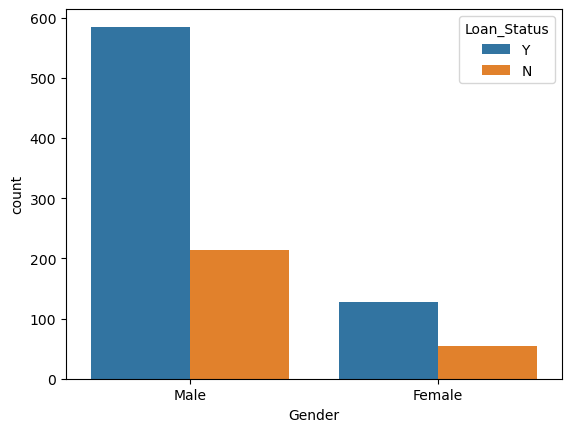

In [14]:
print("Number of People who apply for loan by Gender")
print(cr.Gender.value_counts())
sns.countplot(x = 'Gender', data = cr, hue='Loan_Status');

In [15]:
pd.crosstab(cr.Gender, cr.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,55,127
Male,214,585


### 2) Married:

Number of People who apply for loan by Married or Not
Yes    634
No     347
Name: Married, dtype: int64


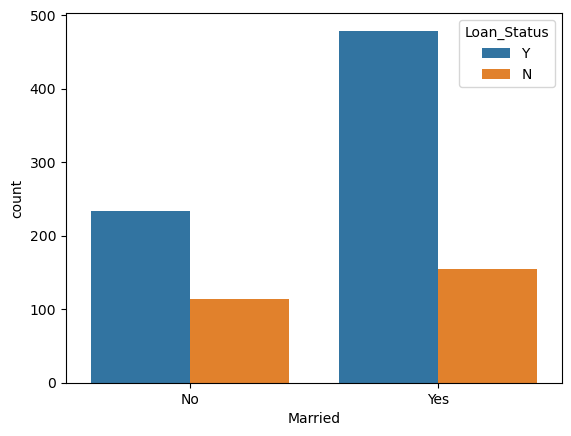

In [16]:
print("Number of People who apply for loan by Married or Not")
print(cr.Married.value_counts())
sns.countplot(x ='Married',data = cr, hue='Loan_Status');

In [17]:
pd.crosstab(cr.Married, cr.Loan_Status)

Loan_Status,N,Y
Married,,
No,114,233
Yes,155,479


### 3) Eduaction :

Number of People who apply for loan by Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64


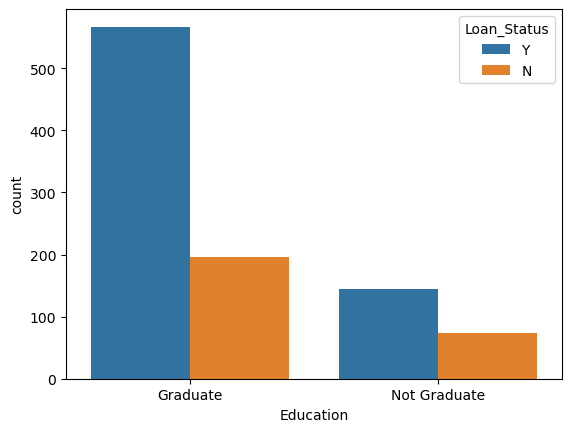

In [18]:
print("Number of People who apply for loan by Education")
print(cr.Education.value_counts())
sns.countplot(x ='Education',data = cr, hue='Loan_Status');

In [19]:
pd.crosstab(cr.Education, cr.Loan_Status)

Loan_Status,N,Y
Education,,
Graduate,196,567
Not Graduate,73,145


### 4) Property_Area :

Number of People who apply for loan by Property Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


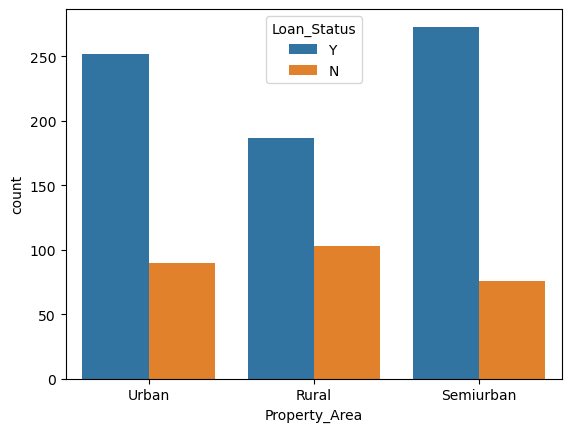

In [20]:
print("Number of People who apply for loan by Property Area")
print(cr.Property_Area.value_counts())
sns.countplot(x ='Property_Area',data = cr, hue='Loan_Status');

In [21]:
pd.crosstab(cr.Property_Area, cr.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,103,187
Semiurban,76,273
Urban,90,252


### 5) Self_Employed :

Number of People who apply for loan by Self_Employed
No     862
Yes    119
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

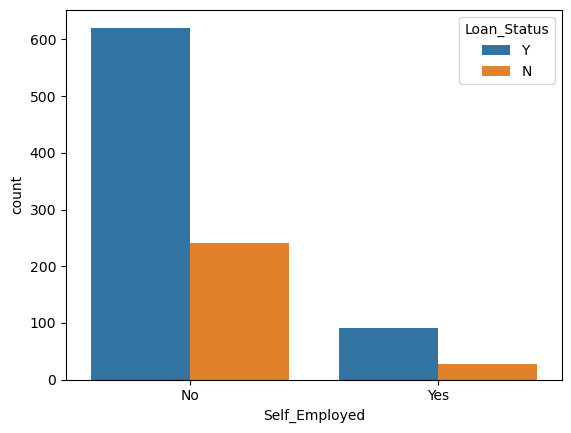

In [22]:
print("Number of People who apply for loan by Self_Employed")
print(cr.Self_Employed.value_counts())
sns.countplot(x =cr['Self_Employed'],hue= cr['Loan_Status'])

In [23]:
pd.crosstab(cr.Self_Employed, cr.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,241,621
Yes,28,91


### 6) Credit_Histroy :

Number of People who apply for loan by Credit_Histroy
1    754
0    227
Name: Credit_History, dtype: int64


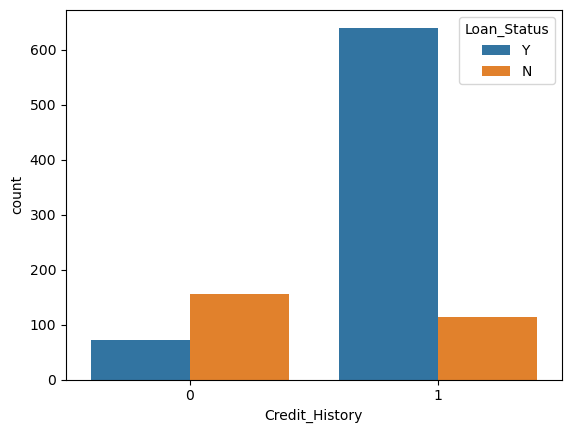

In [24]:
print("Number of People who apply for loan by Credit_Histroy")
print(cr.Credit_History.value_counts())
sns.countplot(x ='Credit_History',data = cr, hue='Loan_Status');

In [25]:
pd.crosstab(cr.Credit_History, cr.Loan_Status)

Loan_Status,N,Y
Credit_History,,
0,155,72
1,114,640


### 7) Dependents :

Number of People who apply for loan by Dependents
0    570
1    160
2    160
4     90
3      1
Name: Dependents, dtype: int64


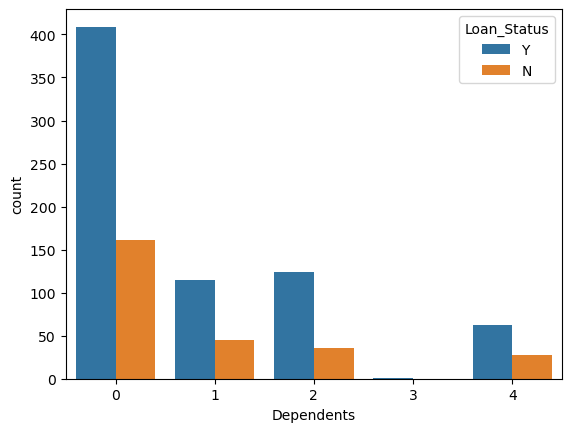

In [26]:
print("Number of People who apply for loan by Dependents")
print(cr.Dependents.value_counts())
sns.countplot(x ='Dependents',data = cr, hue='Loan_Status');

In [27]:
pd.crosstab(cr.Dependents, cr.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,161,409
1,45,115
2,36,124
3,0,1
4,27,63


In [28]:
#Finding the correlation between features.

<Axes: >

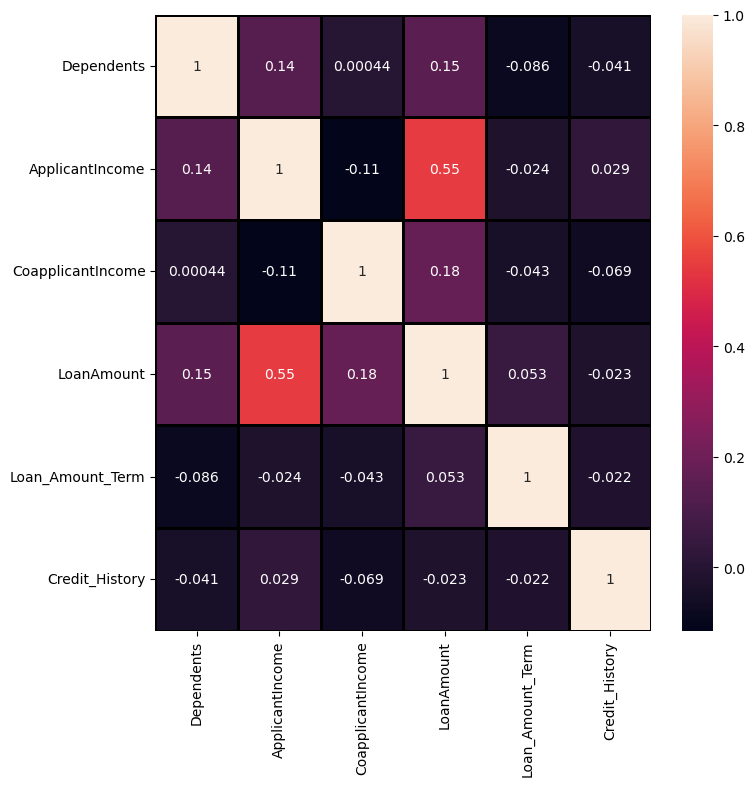

In [29]:
corr = cr.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True,  linecolor='black', linewidths=2)

In [30]:
cr.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.136293,0.000443,0.150972,-0.086199,-0.040587
ApplicantIncome,0.136293,1.000000,-0.114247,0.546241,-0.023823,0.029453
CoapplicantIncome,0.000443,-0.114247,1.000000,0.179327,-0.042750,-0.068562
LoanAmount,0.150972,0.546241,0.179327,1.000000,0.052775,-0.023300
Loan_Amount_Term,-0.086199,-0.023823,-0.042750,0.052775,1.000000,-0.021745
Credit_History,-0.040587,0.029453,-0.068562,-0.023300,-0.021745,1.000000


In [31]:
cr['Total_Income'] = cr.ApplicantIncome + cr.CoapplicantIncome # in coapplicantIncome column many values are zeros so we can combined them.

### Drop the Columns which are unnecessary  

In [32]:
cr = cr.drop({'Loan_ID','CoapplicantIncome'},axis=1)

In [33]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    object 
 1   Married           981 non-null    object 
 2   Dependents        981 non-null    int64  
 3   Education         981 non-null    object 
 4   Self_Employed     981 non-null    object 
 5   ApplicantIncome   981 non-null    int64  
 6   LoanAmount        981 non-null    int64  
 7   Loan_Amount_Term  981 non-null    int64  
 8   Credit_History    981 non-null    int64  
 9   Property_Area     981 non-null    object 
 10  Loan_Status       981 non-null    object 
 11  Total_Income      981 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 92.1+ KB


### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cr.Gender = le.fit_transform(cr.Gender)
cr.Married = le.fit_transform(cr.Married)
cr.Education = le.fit_transform(cr.Education)
cr.Self_Employed = le.fit_transform(cr.Self_Employed)
cr.Property_Area = le.fit_transform(cr.Property_Area)
cr.Loan_Status = le.fit_transform(cr.Loan_Status)

In [35]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            981 non-null    int32  
 1   Married           981 non-null    int32  
 2   Dependents        981 non-null    int64  
 3   Education         981 non-null    int32  
 4   Self_Employed     981 non-null    int32  
 5   ApplicantIncome   981 non-null    int64  
 6   LoanAmount        981 non-null    int64  
 7   Loan_Amount_Term  981 non-null    int64  
 8   Credit_History    981 non-null    int64  
 9   Property_Area     981 non-null    int32  
 10  Loan_Status       981 non-null    int32  
 11  Total_Income      981 non-null    float64
dtypes: float64(1), int32(6), int64(5)
memory usage: 69.1 KB


### Checking outliers present in features :

<Axes: >

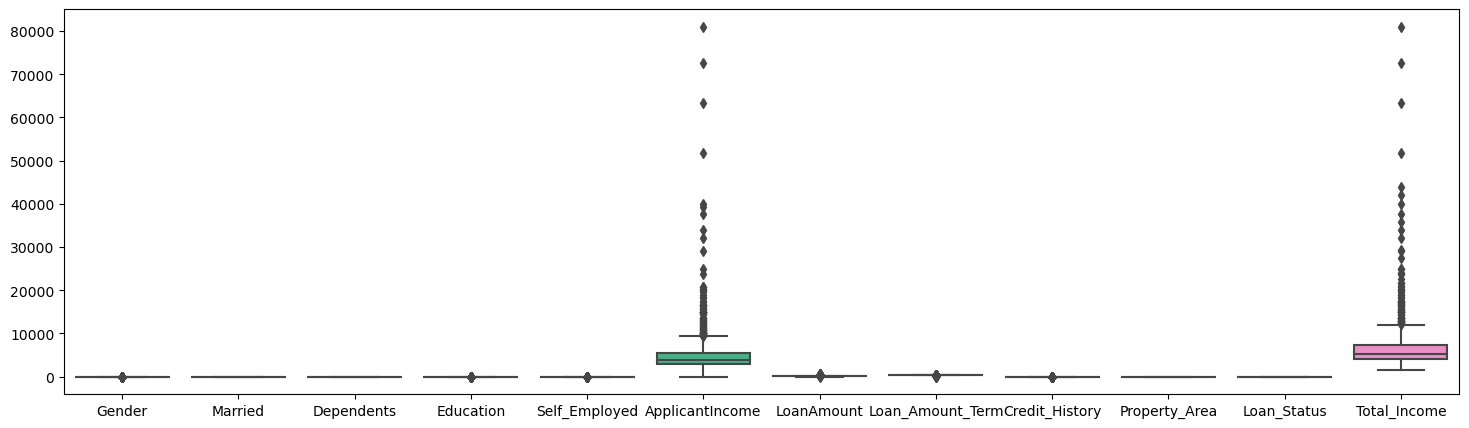

In [36]:
plt.figure(figsize=(18,5))

sns.boxplot(data = cr)

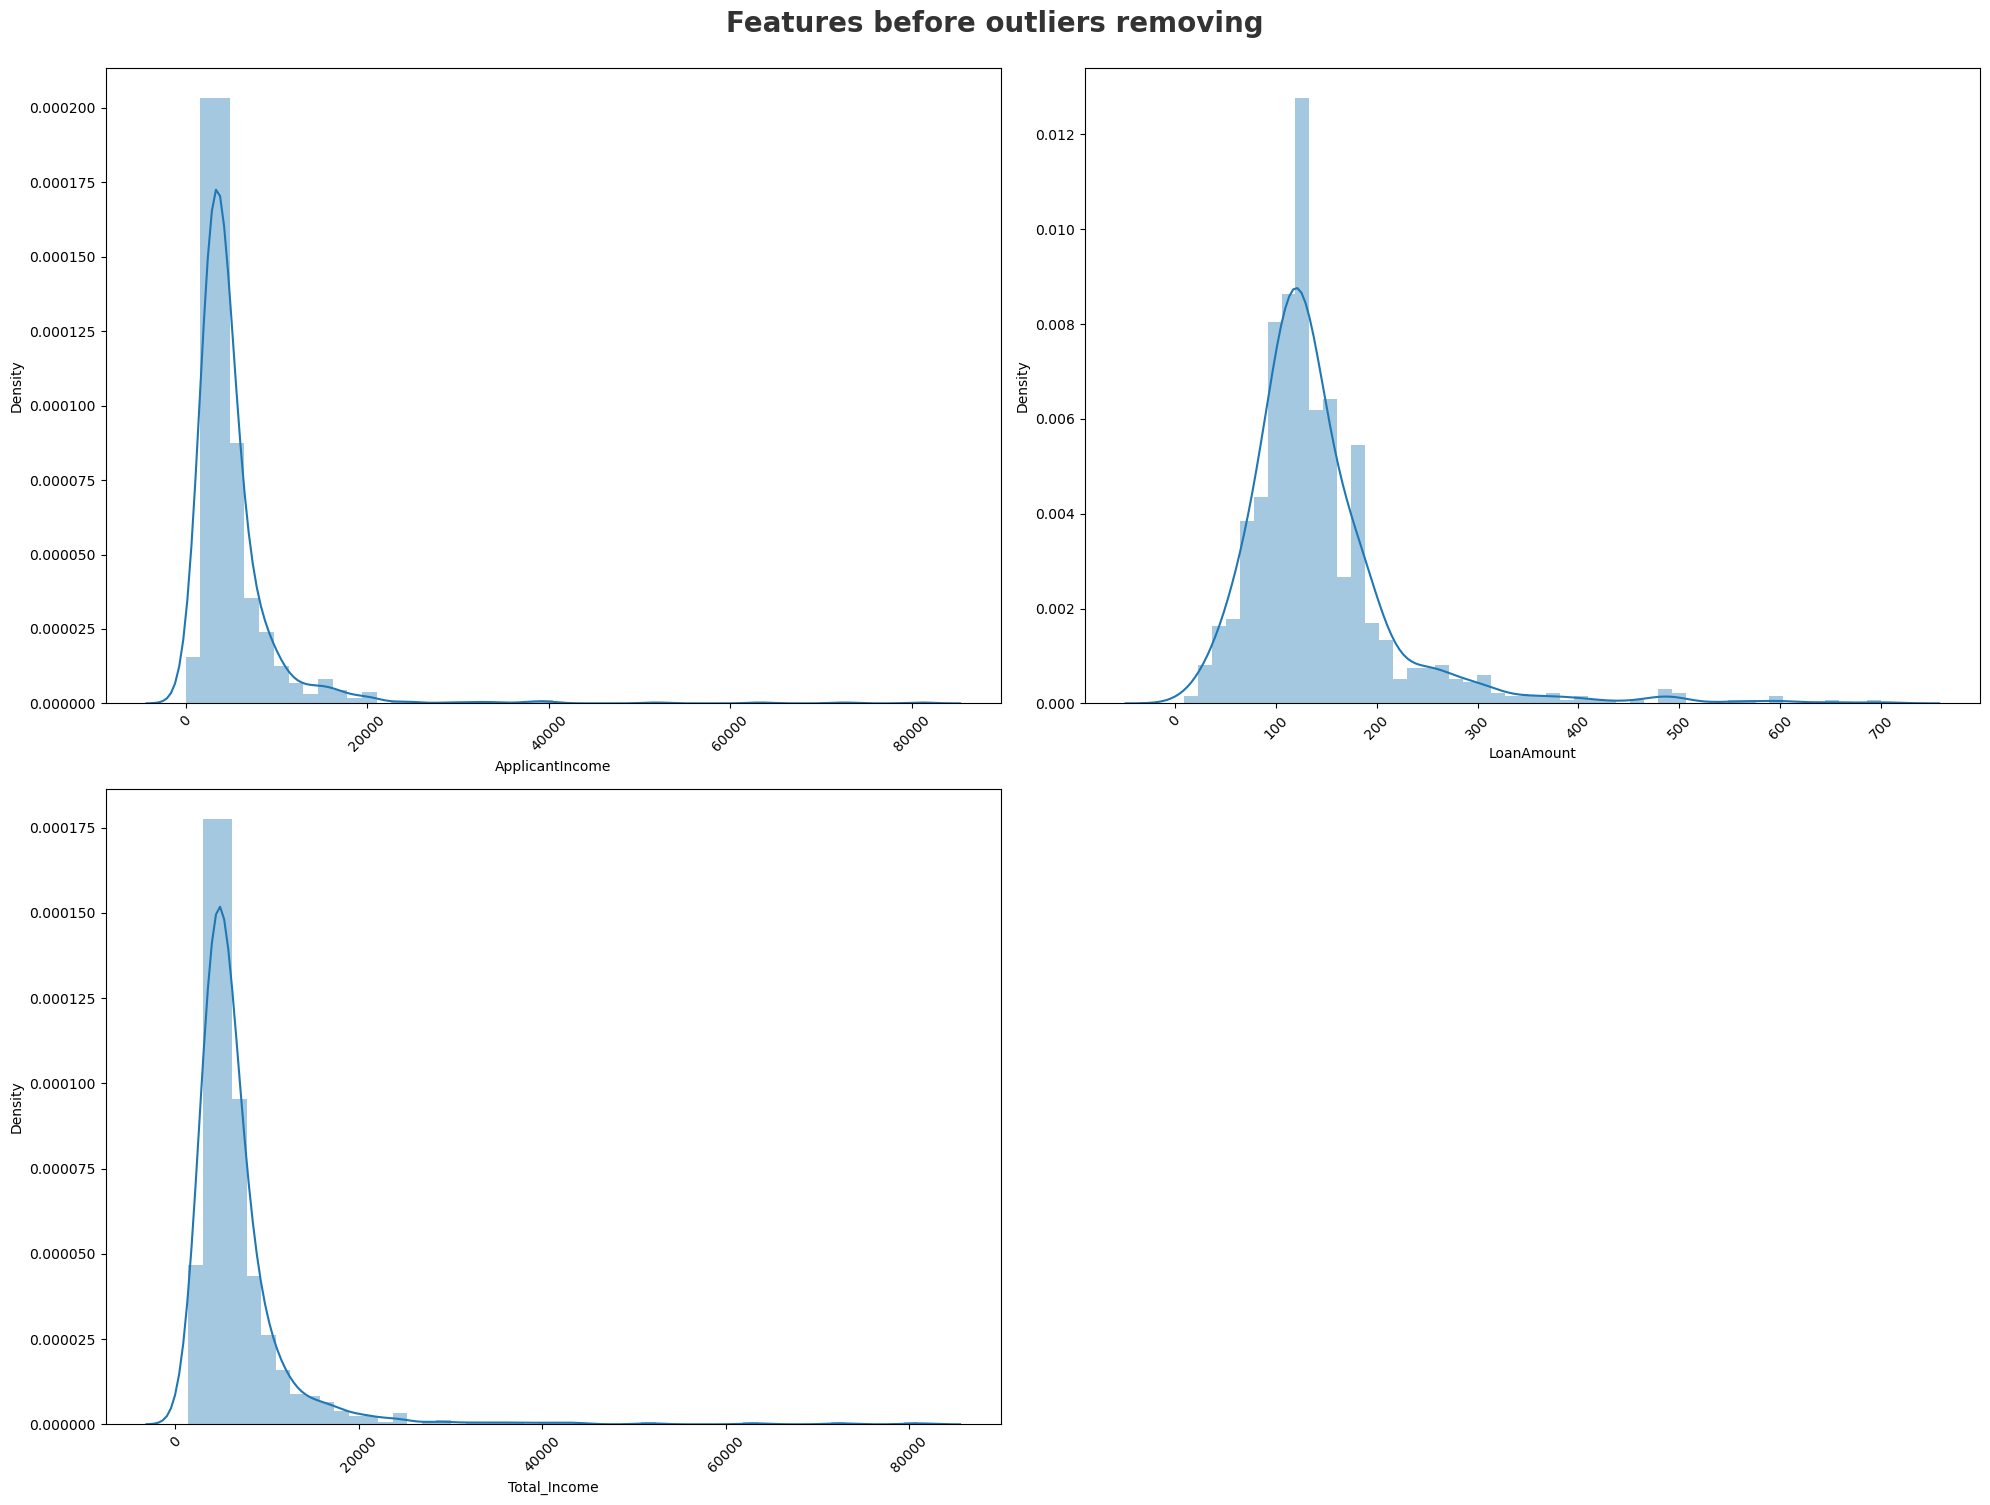

In [37]:
plt.figure(figsize=(20, 15))
plt.suptitle('Features before outliers removing', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

columns = ['ApplicantIncome','LoanAmount','Total_Income']
for i in range(0, len(columns)):
    plt.subplot(2,2, i+1)
    sns.distplot(cr[columns[i]])
    plt.xlabel(columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [38]:
cr1 = cr    # MAKING COPY OF DATASET

### Detecting and removing outliers using IQR

In [47]:
outliers_columns = ['ApplicantIncome','LoanAmount','Total_Income']

for i in outliers_columns:
    Q1 = cr[i].quantile(0.25)
    Q3 = cr[i].quantile(0.75)
    IQR = Q3 - Q1
    cr = cr[~((cr[i] < (Q1 - 1.5 * IQR)) | (cr[i] > (Q3 + 1.5 * IQR)))]

print("Total numner of rows & columns before removing outliers",cr1.shape)
print("Total numner of rows & columns after removing outliers",cr.shape)

Total numner of rows & columns before removing outliers (981, 12)
Total numner of rows & columns after removing outliers (747, 12)


<Axes: >

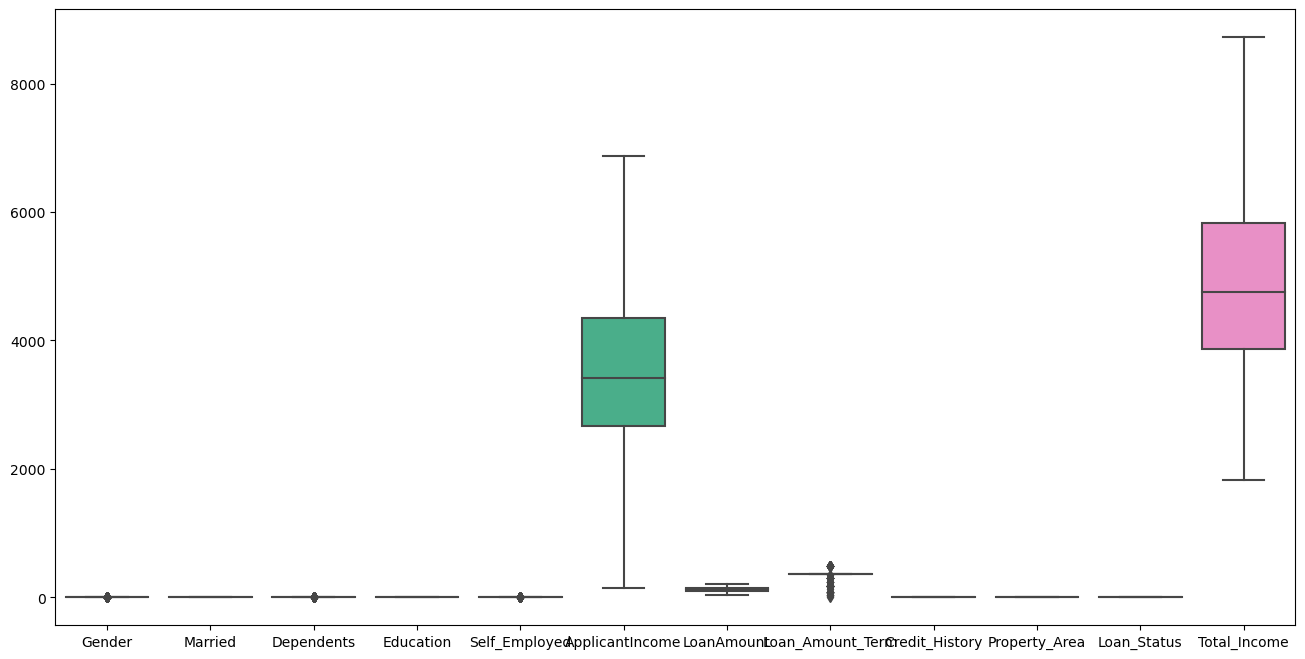

In [48]:
# after removing outliers :
plt.figure(figsize=(16,8))
sns.boxplot(data=cr)

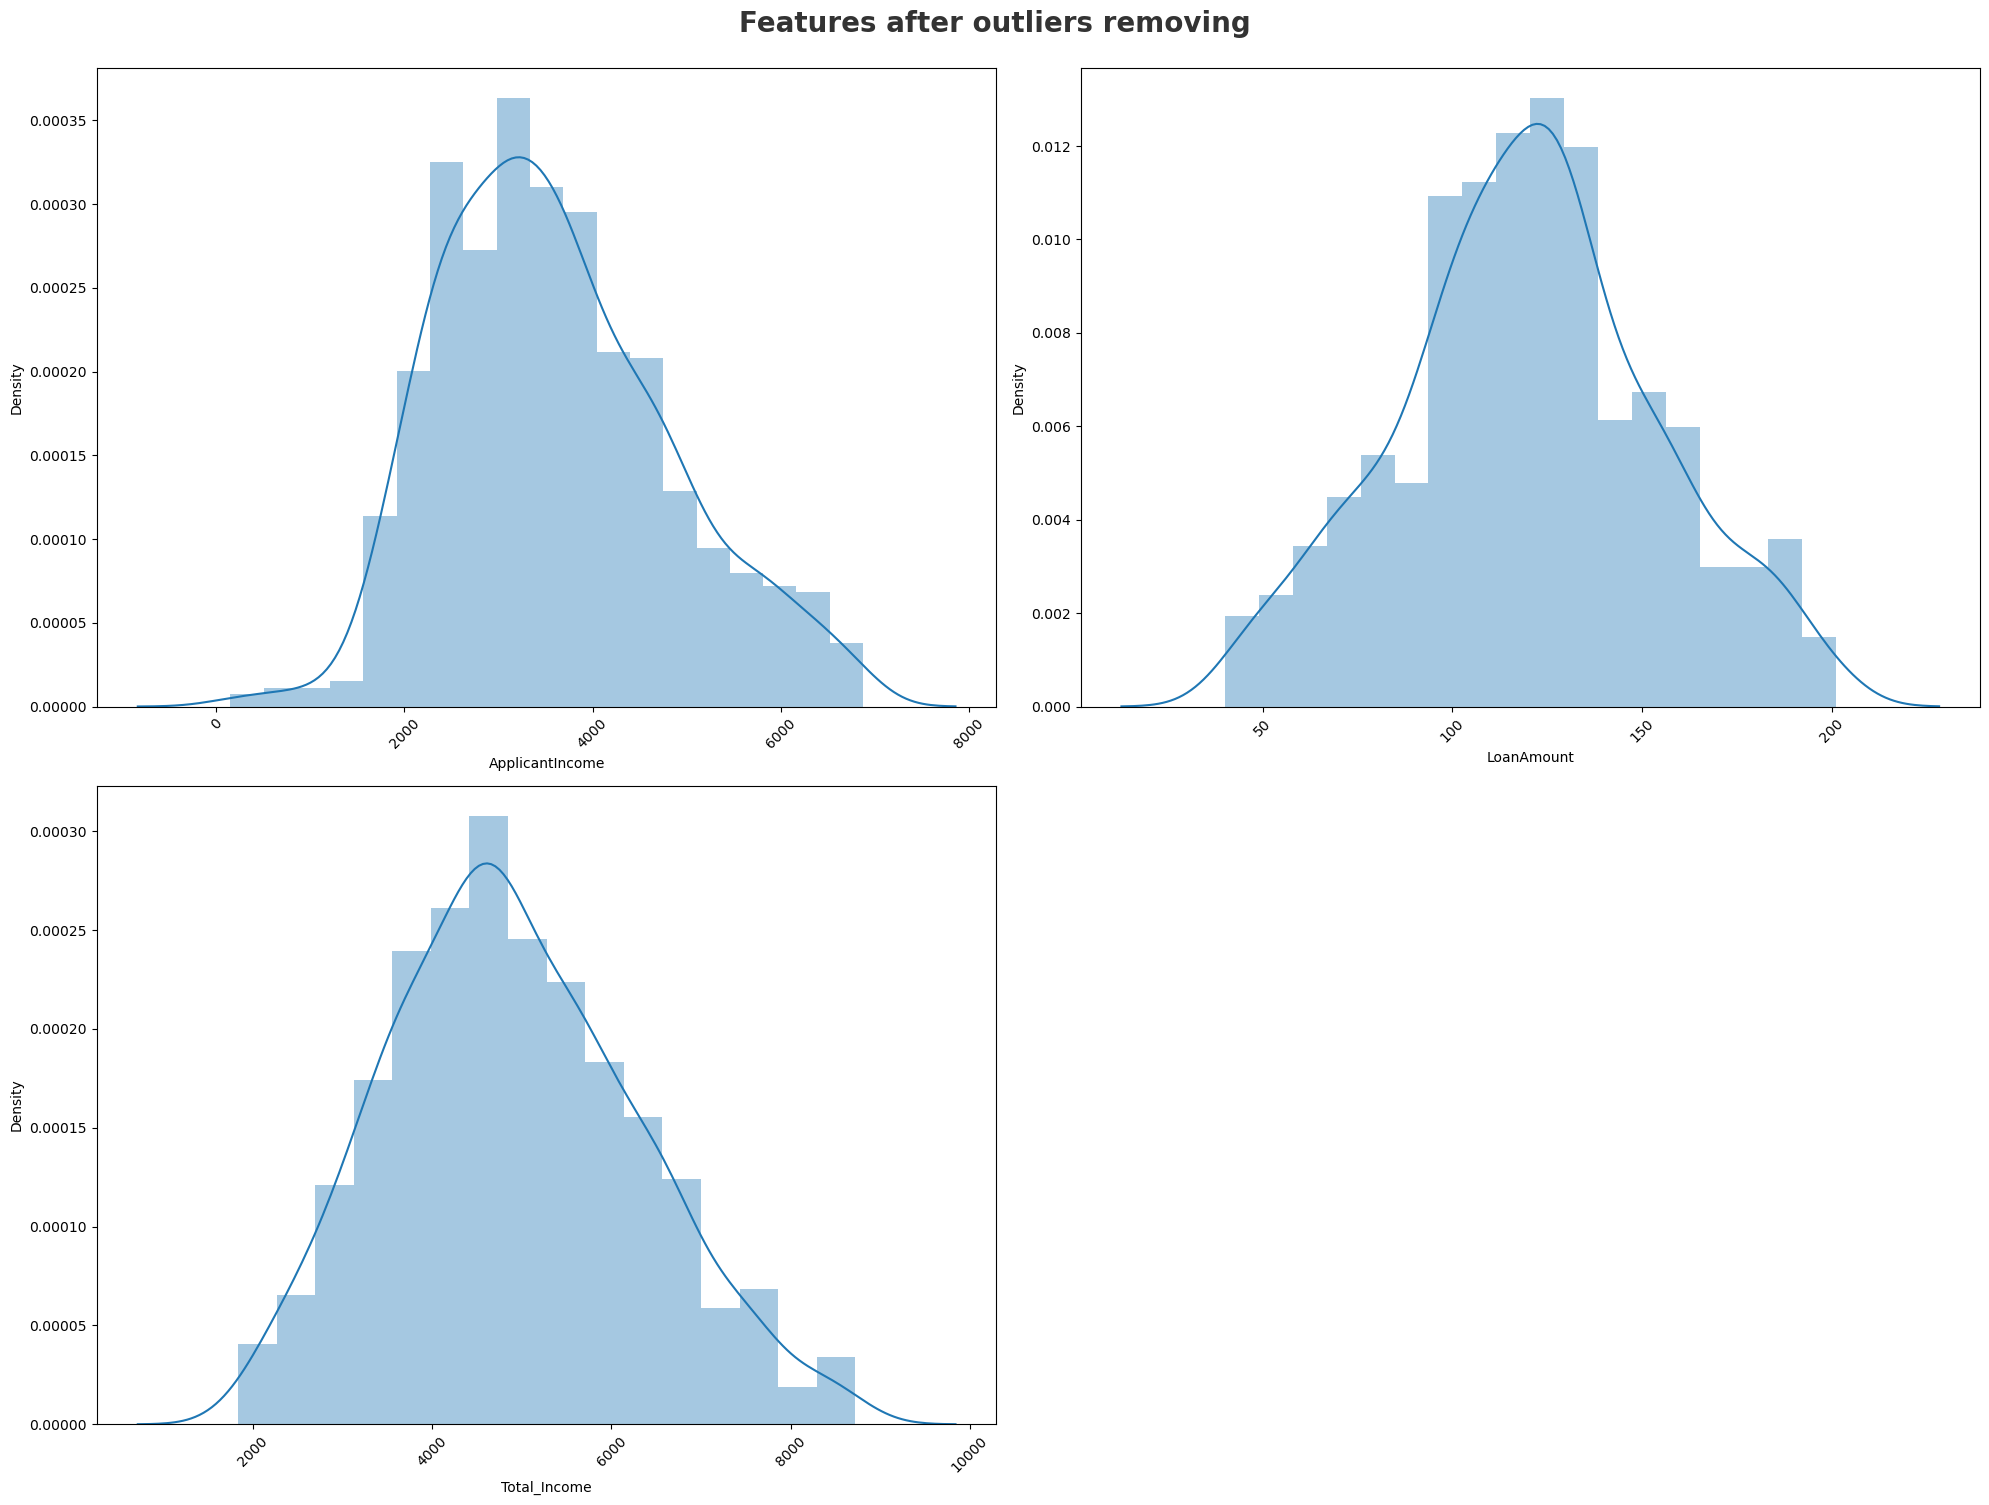

In [49]:
plt.figure(figsize=(20, 15))
plt.suptitle('Features after outliers removing', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

columns = ['ApplicantIncome','LoanAmount','Total_Income']
for i in range(0, len(columns)):
    plt.subplot(2, 2, i+1)
    sns.distplot(cr[columns[i]])
    plt.xlabel(columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [50]:
# Split data into Dependent and Independent variables:
X = cr.drop({'Loan_Status'},axis=1)
y = cr.Loan_Status

# <font color ="brown" size = 6> **Data Transformation:** </font>

In [51]:
#using Standardization : in which mean is 0 and std is 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.49497475, -1.29886503, -0.65726319, ...,  0.57786553,
         1.19083998,  0.68133331],
       [ 0.49497475,  0.76990294,  0.16790589, ...,  0.57786553,
        -1.32558849,  0.85435759],
       [ 0.49497475,  0.76990294, -0.65726319, ...,  0.57786553,
         1.19083998, -1.35563436],
       ...,
       [ 0.49497475, -1.29886503, -0.65726319, ..., -1.7305064 ,
        -0.06737426,  0.24805763],
       [ 0.49497475,  0.76990294, -0.65726319, ...,  0.57786553,
        -1.32558849,  1.78525683],
       [-2.02030509, -1.29886503, -0.65726319, ..., -1.7305064 ,
        -0.06737426, -0.22382677]])

In [52]:
#Data after standardization 

In [53]:
df_scaled =pd.DataFrame(X_scaled)
df_scaled.columns = X.columns
df_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0.494975,-1.298865,-0.657263,-0.600546,-0.308720,1.835929,0.177260,0.238148,0.577866,1.190840,0.681333
1,0.494975,0.769903,0.167906,-0.600546,-0.308720,0.805221,0.235901,0.238148,0.577866,-1.325588,0.854358
2,0.494975,0.769903,-0.657263,-0.600546,3.239183,-0.483572,-1.581990,0.238148,0.577866,1.190840,-1.355634
3,0.494975,0.769903,-0.657263,1.665151,-0.308720,-0.823071,0.001335,0.238148,0.577866,1.190840,0.032135
4,0.494975,-1.298865,-0.657263,-0.600546,-0.308720,1.958865,0.617072,0.238148,0.577866,1.190840,0.789295
...,...,...,...,...,...,...,...,...,...,...,...
742,-2.020305,-1.298865,-0.657263,-0.600546,-0.308720,-0.564987,-1.435386,0.238148,0.577866,-1.325588,-1.427132
743,0.494975,0.769903,2.643413,-0.600546,-0.308720,0.416873,-2.344332,-2.596605,0.577866,-1.325588,-0.564870
744,0.494975,-1.298865,-0.657263,-0.600546,-0.308720,-0.280036,0.177260,0.238148,-1.730506,-0.067374,0.248058
745,0.494975,0.769903,-0.657263,-0.600546,-0.308720,1.144720,1.115526,0.238148,0.577866,-1.325588,1.785257


# <font color ="Brown" size = 6>**Model Buidling & Evaluation :** </font>

In [54]:
# Import libraries for model building and Evaluation:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Random sampling:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.25, random_state=1999)

In [56]:
X_train.shape

(560, 11)

In [57]:
X_test.shape

(187, 11)

## <font color = "Orange"> **Build Logistic Regression Model**</font>

In [58]:
logreg = LogisticRegression(random_state=12)
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
accu = accuracy_score(y_test,pred_logreg)
print("Accuracy score of Logistic Regression Model on Test Data:",(accu*100).round(2))

pred_logreg_train = logreg.predict(X_train)
accu = accuracy_score(y_train,pred_logreg_train)
print("Accuracy score of Logistic Regression Model on Train Data:",(accu*100).round(2))

Accuracy score of Logistic Regression Model on Test Data: 83.96
Accuracy score of Logistic Regression Model on Train Data: 80.89


In [59]:
confusion_matrix(y_test,pred_logreg)

array([[ 24,  23],
       [  7, 133]], dtype=int64)

In [60]:
score_logreg = cross_val_score(logreg,X_train,y_train, cv=5)
print("Cross Validation Score of Logistic Regression Model:",(score_logreg.mean()*100).round(2))

Cross Validation Score of Logistic Regression Model: 80.0


## <font color = "Orange"> **Build Decision Tree Model**</font>

In [61]:
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train,y_train)
pred_dt = dt.predict(X_test)
accu = accuracy_score(y_test,pred_dt)
print("Accuracy score of Decision Tree Model Test Data:",(accu*100).round(2))


pred_dt_train = dt.predict(X_train)
accu = accuracy_score(y_train,pred_dt_train)
print("Accuracy score of Decision Tree Model on Train Data:",(accu*100).round(2))

Accuracy score of Decision Tree Model Test Data: 71.12
Accuracy score of Decision Tree Model on Train Data: 100.0


In [62]:
confusion_matrix(y_test,pred_dt)

array([[ 21,  26],
       [ 28, 112]], dtype=int64)

In [63]:
score_dt = cross_val_score(dt,X_train,y_train, cv=5 )
print("Cross Validation Score of Decision Tree Model:", (score_dt.mean()*100).round(2))

Cross Validation Score of Decision Tree Model: 75.89


## <font color = "Orange">**Build Random Forest Model**</font>

In [64]:
rfc = RandomForestClassifier(random_state=12)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
accu = accuracy_score(y_test,pred_rfc)
print("Accuracy score of Random Forest Model on Test Data:",(accu*100).round(2))

pred_rfc_train = rfc.predict(X_train)
accu = accuracy_score(y_train,pred_rfc_train)
print("Accuracy score of Random Forest Model on Train Data:",(accu*100).round(2))

Accuracy score of Random Forest Model on Test Data: 78.61
Accuracy score of Random Forest Model on Train Data: 100.0


In [65]:
confusion_matrix(y_test,pred_rfc)

array([[ 21,  26],
       [ 14, 126]], dtype=int64)

In [66]:
score_rfc = cross_val_score(rfc,X_train,y_train, cv= 5)
print("Cross Validation Score of Random Forest Model:", (score_rfc.mean()*100).round(2))

Cross Validation Score of Random Forest Model: 76.79


## <font color = "Orange">**Build KNN Model**</font>

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
accu = accuracy_score(y_test,pred_knn)
print("Accuracy score of KNN Model on Test Data:",(accu*100).round(2))


pred_knn_train = knn.predict(X_train)
accu = accuracy_score(y_train,pred_knn_train)
print("Accuracy score of KNN Model on Train Data:",(accu*100).round(2))

Accuracy score of KNN Model on Test Data: 79.14
Accuracy score of KNN Model on Train Data: 85.18


In [68]:
confusion_matrix(y_test,pred_knn)

array([[ 19,  28],
       [ 11, 129]], dtype=int64)

In [69]:
score_knn = cross_val_score(knn,X_train,y_train, cv= 5)
print("Cross Validation Score of KNN Model:", (score_knn.mean()*100).round(2))

Cross Validation Score of KNN Model: 78.57


## <font color = "Orange">**Build SVM Model**</font>

In [70]:
svm =SVC(random_state=12)
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
accu = accuracy_score(y_test,pred_svm)
print("Accuracy score of SVM Model on Test Data:",(accu*100).round(2))


pred_svm_train = svm.predict(X_train)
accu = accuracy_score(y_train,pred_svm_train)
print("Accuracy score of SVM Model on Train Data:",(accu*100).round(2))

Accuracy score of SVM Model on Test Data: 81.28
Accuracy score of SVM Model on Train Data: 84.11


In [71]:
confusion_matrix(y_test,pred_svm)

array([[ 23,  24],
       [ 11, 129]], dtype=int64)

In [72]:
score_svm = cross_val_score(svm,X_train,y_train, cv=5)
print("Cross Validation Score of SVM Model:", (score_svm.mean()*100).round(2))

Cross Validation Score of SVM Model: 79.11


In [73]:
print("Cross Validation Score of Logistic Regression Model:",(score_logreg.mean()*100).round(2))
print("Cross Validation Score of Decision Tree Model:",(score_dt.mean()*100).round(2))
print("Cross Validation Score of Random Forest Model:",(score_rfc.mean()*100).round(2))
print("Cross Validation Score of KNN Model:",(score_knn.mean()*100).round(2))
print("Cross Validation Score of SVM Model:",(score_svm.mean()*100).round(2))

Cross Validation Score of Logistic Regression Model: 80.0
Cross Validation Score of Decision Tree Model: 75.89
Cross Validation Score of Random Forest Model: 76.79
Cross Validation Score of KNN Model: 78.57
Cross Validation Score of SVM Model: 79.11


In [74]:
print("Classification report for Logistic Regression Model on Test Data:")
print(classification_report(y_test,pred_logreg))
print("\n")
print("Classification report for Decision Tree Model on Test Data:")
print(classification_report(y_test,pred_dt))
print("\n")
print("Classification report for Random Forest Model on Test Data:")
print(classification_report(y_test,pred_rfc))
print("\n")
print("Classification report for KNN Model on Test Data:")
print(classification_report(y_test,pred_knn))
print("\n")
print("Classification report for SVM Model on Test Data:")
print(classification_report(y_test,pred_svm))

Classification report for Logistic Regression Model on Test Data:
              precision    recall  f1-score   support

           0       0.77      0.51      0.62        47
           1       0.85      0.95      0.90       140

    accuracy                           0.84       187
   macro avg       0.81      0.73      0.76       187
weighted avg       0.83      0.84      0.83       187



Classification report for Decision Tree Model on Test Data:
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        47
           1       0.81      0.80      0.81       140

    accuracy                           0.71       187
   macro avg       0.62      0.62      0.62       187
weighted avg       0.72      0.71      0.71       187



Classification report for Random Forest Model on Test Data:
              precision    recall  f1-score   support

           0       0.60      0.45      0.51        47
           1       0.83      0.90      0.86    

####  <font size = 3>**Observation 01 :**</font>

> In data set we see class imbalanced so to overcome this problem we can do any 2 techniques 1: Oversampling or 2: Undersampling.

####  <font size = 3>**Observation 02 :**</font>

> In data set we also see data is over fitted, because it's give good results on train data and poor results on test data. So to overcome this problem we can use PCA technique. PCA is used to remove insignificant features from dataset.

### Oversampling using SMOTE :

In [75]:
# SMOTE : Synthetic Minority Oversampling Technique, is a statistical technique used to balance the distribution of classes in a dataset.

In [76]:
df_scaled.shape

(747, 11)

In [77]:
y.value_counts()

1    538
0    209
Name: Loan_Status, dtype: int64

In [78]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=12)
X_resampling,y_resampling = smt.fit_resample(df_scaled,y)

In [79]:
y_resampling.value_counts()

1    538
0    538
Name: Loan_Status, dtype: int64

In [80]:
X_train_resampling,X_test_resampling,y_train_resampling,y_test_resampling =train_test_split(X_resampling,y_resampling,test_size=.25,random_state=1111)

In [81]:
# Logistic Regression after oversampling :

In [82]:
logreg = LogisticRegression(random_state=12)
logreg.fit(X_train_resampling,y_train_resampling)
pred_logreg = logreg.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_logreg)
print("Accuracy score of Logistic Regression Model on Test Data After Oversampling:",accu*100)

train_pred_logreg = logreg.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_logreg)
print("Accuracy score of Logistic Regression Model on Train Data After Oversampling:",accu*100)

Accuracy score of Logistic Regression Model on Test Data After Oversampling: 80.29739776951673
Accuracy score of Logistic Regression Model on Train Data After Oversampling: 76.70384138785626


In [83]:
confusion_matrix(y_test_resampling,pred_logreg)

array([[ 90,  34],
       [ 19, 126]], dtype=int64)

In [84]:
score_logreg = cross_val_score(logreg,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of Logistic Regression Model after over sampling:", (score_logreg.mean()*100).round(2))

Cross Validation Score of Logistic Regression Model after over sampling: 76.22


In [85]:
# Decision Tree after oversampling :

In [86]:
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train_resampling,y_train_resampling)
pred_dt = dt.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_dt)
print("Accuracy score of Decision Tree Model on Test Data After Oversampling:",accu*100)

train_pred_dt = dt.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_dt)
print("Accuracy score of Decision Tree Model on Train Data After Oversampling:",accu*100)

Accuracy score of Decision Tree Model on Test Data After Oversampling: 78.06691449814126
Accuracy score of Decision Tree Model on Train Data After Oversampling: 100.0


In [87]:
confusion_matrix(y_test_resampling,pred_dt)

array([[101,  23],
       [ 36, 109]], dtype=int64)

In [88]:
score_dt = cross_val_score(dt,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of Decision Tree Model after over sampling:", (score_dt.mean()*100).round(2))

Cross Validation Score of Decision Tree Model after over sampling: 73.98


In [89]:
# Random Forest after oversampling :

In [90]:
rfc = RandomForestClassifier(random_state=12)
rfc.fit(X_train_resampling,y_train_resampling)
pred_rfc = rfc.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_rfc)
print("Accuracy score of Random Forest Model on Test Data After Oversampling:",accu*100)

train_pred_rfc = rfc.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_rfc)
print("Accuracy score of Random Forest Model on Train Data After Oversampling:",accu*100)

Accuracy score of Random Forest Model on Test Data After Oversampling: 88.10408921933085
Accuracy score of Random Forest Model on Train Data After Oversampling: 100.0


In [91]:
confusion_matrix(y_test_resampling,pred_rfc)

array([[112,  12],
       [ 20, 125]], dtype=int64)

In [92]:
score_rfc = cross_val_score(rfc,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of Random Forest Model after over sampling:", (score_rfc.mean()*100).round(2))

Cross Validation Score of Random Forest Model after over sampling: 82.77


In [93]:
# KNN after oversampling :

In [94]:
knn = KNeighborsClassifier()
knn.fit(X_train_resampling,y_train_resampling)
pred_knn = knn.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_knn)
print("Accuracy score of KNN Model on Test Data After Oversampling::",accu*100)

train_pred_knn = knn.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_knn)
print("Accuracy score of KNN Model on Train Data After Oversampling::",accu*100)

Accuracy score of KNN Model on Test Data After Oversampling:: 80.66914498141264
Accuracy score of KNN Model on Train Data After Oversampling:: 86.12143742255266


In [95]:
confusion_matrix(y_test_resampling,pred_knn)

array([[109,  15],
       [ 37, 108]], dtype=int64)

In [96]:
score_knn = cross_val_score(knn,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of KNN Model after over sampling:", (score_knn.mean()*100).round(2))

Cross Validation Score of KNN Model after over sampling: 78.32


In [97]:
# SVM after oversampling :

In [98]:
svm =SVC(random_state=12)
svm.fit(X_train_resampling,y_train_resampling)
pred_svm = svm.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_svm)
print("Accuracy score of SVM Model on Test Data After Oversampling::",(accu*100).round(2))

train_pred_svm = svm.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_svm)
print("Accuracy score of SVM Model on Train Data After Oversampling::",(accu*100).round(2))

Accuracy score of SVM Model on Test Data After Oversampling:: 82.16
Accuracy score of SVM Model on Train Data After Oversampling:: 83.64


In [99]:
confusion_matrix(y_test_resampling,pred_svm)

array([[ 97,  27],
       [ 21, 124]], dtype=int64)

In [100]:
score_svm = cross_val_score(svm,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of SVM Model after over sampling:", (score_svm.mean()*100).round(2))

Cross Validation Score of SVM Model after over sampling: 78.69


In [101]:
print("Classification report for Logistic Regression Model After Oversampling::")
print(classification_report(y_test_resampling,pred_logreg))
print("\n")
print("Classification report for Decision Tree Model After Oversampling::")
print(classification_report(y_test_resampling,pred_dt))
print("\n")
print("Classification report for Random Forest Model After Oversampling::")
print(classification_report(y_test_resampling,pred_rfc))
print("\n")
print("Classification report for KNN Model After Oversampling::")
print(classification_report(y_test_resampling,pred_knn))
print("\n")
print("Classification report for SVM Model on Test Data After Oversampling::")
print(classification_report(y_test_resampling,pred_svm))

Classification report for Logistic Regression Model After Oversampling::
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       124
           1       0.79      0.87      0.83       145

    accuracy                           0.80       269
   macro avg       0.81      0.80      0.80       269
weighted avg       0.81      0.80      0.80       269



Classification report for Decision Tree Model After Oversampling::
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       124
           1       0.83      0.75      0.79       145

    accuracy                           0.78       269
   macro avg       0.78      0.78      0.78       269
weighted avg       0.78      0.78      0.78       269



Classification report for Random Forest Model After Oversampling::
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       124
           1       0.91   

### Hyper Parameter Tunning

### Logistic Regression:

In [102]:
from sklearn.model_selection import GridSearchCV # get the best combination of hyper parameters
search_dict = {'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]}

# Search_dict  = dictionary created by the user 

logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg , param_grid= search_dict, cv= 5 , scoring='accuracy')

In [103]:
grid_logreg.fit(X_train_resampling,y_train_resampling)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [104]:
grid_logreg.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [105]:
logreg = LogisticRegression(C=0.01,max_iter=100,penalty='l1',solver='liblinear')
logreg.fit(X_train_resampling,y_train_resampling)

pred_logreg = logreg.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_logreg)
print("Accuracy score of Logistic Regression Model on Test Data:",accu*100)

train_pred_logreg = logreg.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_logreg)
print("Accuracy score of Logistic Regression Model on Train Data:",accu*100)

Accuracy score of Logistic Regression Model on Test Data: 80.66914498141264
Accuracy score of Logistic Regression Model on Train Data: 76.33209417596035


In [106]:
score_logreg = cross_val_score(logreg,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of Logistic Regression Model after:", (score_logreg.mean()*100).round(2))

Cross Validation Score of Logistic Regression Model after: 76.34


### Decision Tree:

In [107]:
from sklearn.model_selection import GridSearchCV # get the best combination of hyper parameters
search_dict = {"criterion" : ["gini" , "entropy"],
              "max_depth" : range(2,11) , 
              "min_samples_split" : range(25,50 ,100)}

# Search_dict  = dictionary created by the user 

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt , param_grid= search_dict, cv= 5 , scoring='accuracy')

In [108]:
grid_dt.fit(X_train_resampling,y_train_resampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_split': range(25, 50, 100)},
             scoring='accuracy')

In [109]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 25}

In [110]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_split =  25)
dt.fit(X_train_resampling,y_train_resampling)

pred_dt = dt.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_dt)
print("Accuracy score of Decision Tree Model on Test Data:",accu*100)

train_pred_dt = dt.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_dt)
print("Accuracy score of Decision Tree Model on Train Data:",accu*100)

Accuracy score of Decision Tree Model on Test Data: 81.41263940520446
Accuracy score of Decision Tree Model on Train Data: 83.51920693928129


In [111]:
score_dt = cross_val_score(dt,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of DT Model:", (score_dt.mean()*100).round(2))

Cross Validation Score of DT Model: 78.32


### Random Forest :

In [112]:
from sklearn.model_selection import GridSearchCV # get the best combination of hyper parameters
search_dict = {
              "criterion" : ["gini" , "entropy"],
              "max_depth" : range(2,11), 
              "min_samples_split" : range(25,50 ,100),
              "bootstrap": [True, False]}

# Search_dict  = dictionary created by the user 

rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc , param_grid= search_dict, cv=5, scoring='accuracy')

In [113]:
grid_rfc.fit(X_train_resampling,y_train_resampling)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 11),
                         'min_samples_split': range(25, 50, 100)},
             scoring='accuracy')

In [114]:
grid_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 25}

In [115]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth= 10, min_samples_split =25,bootstrap=False)
rfc.fit(X_train_resampling,y_train_resampling)

pred_rfc = rfc.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_rfc)
print("Accuracy score of Random Forest Model on Test Data:",accu*100)

train_pred_rfc = rfc.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_rfc)
print("Accuracy score of Random Forest Model on Train Data:",accu*100)

Accuracy score of Random Forest Model on Test Data: 85.50185873605948
Accuracy score of Random Forest Model on Train Data: 89.59107806691449


In [116]:
score_rfc = cross_val_score(rfc,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of RFC Model:", (score_rfc.mean()*100).round(2))

Cross Validation Score of RFC Model: 81.66


### KNN Model:

In [117]:
from sklearn.model_selection import GridSearchCV # get the best combination of hyper parameters
search_dict = {'n_neighbors': [3, 5, 7, 9],
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}
               
# Search_dict  = dictionary created by the user 

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn , param_grid= search_dict, cv = 5 ,scoring = 'accuracy')

 
#  n_neighbors : Number of neighbors to use
#  weights     : Weight function used in prediction ('uniform', 'distance')
#  metric      : Distance

In [118]:
grid_knn.fit(X_train_resampling,y_train_resampling)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [119]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [120]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train_resampling,y_train_resampling)

pred_knn = knn.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_knn)
print("Accuracy score of KNN Model on Test Data:",accu*100)

train_pred_knn = knn.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_knn)
print("Accuracy score of KNN Model on Train Data:",accu*100)

Accuracy score of KNN Model on Test Data: 85.87360594795538
Accuracy score of KNN Model on Train Data: 100.0


In [121]:
score_knn = cross_val_score(knn,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of KNN Model after over sampling:", (score_knn.mean()*100).round(2))

Cross Validation Score of KNN Model after over sampling: 81.79


### SVM :

In [122]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
search_dict = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [3, 4, 5]}                            # Only applicable for 'poly' kernel


# Search_dict  = dictionary created by the user 

svm = SVC()
grid_svm = GridSearchCV(svm , param_grid= search_dict, cv = 5 ,scoring = 'accuracy')

In [123]:
grid_svm.fit(X_train_resampling,y_train_resampling)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [124]:
grid_svm.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

In [125]:
svm =SVC(C=10,gamma='scale',kernel='rbf')
svm.fit(X_train_resampling,y_train_resampling)

pred_svm = svm.predict(X_test_resampling)
accu = accuracy_score(y_test_resampling,pred_svm)
print("Accuracy score of SVM Model on Test Data:",(accu*100).round(2))

train_pred_svm = svm.predict(X_train_resampling)
accu = accuracy_score(y_train_resampling,train_pred_svm)
print("Accuracy score of SVM Model on Train Data:",(accu*100).round(2))

Accuracy score of SVM Model on Test Data: 85.5
Accuracy score of SVM Model on Train Data: 90.83


In [126]:
score_svm = cross_val_score(svm,X_train_resampling,y_train_resampling, cv= 5)
print("Cross Validation Score of SVM Model after over sampling:", (score_svm.mean()*100).round(2))

Cross Validation Score of SVM Model after over sampling: 80.42


In [127]:
print("Classification report for Logistic Regression Model:")
print(classification_report(y_test_resampling,pred_logreg))
print("\n")
print("Classification report for Decision Tree Model:")
print(classification_report(y_test_resampling,pred_dt))
print("\n")
print("Classification report for Random Forest Model:")
print(classification_report(y_test_resampling,pred_rfc))
print("\n")
print("Classification report for KNN Model:")
print(classification_report(y_test_resampling,pred_knn))
print("\n")
print("Classification report for SVM Model:")
print(classification_report(y_test_resampling,pred_svm))

Classification report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       124
           1       0.78      0.89      0.83       145

    accuracy                           0.81       269
   macro avg       0.81      0.80      0.80       269
weighted avg       0.81      0.81      0.80       269



Classification report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       124
           1       0.81      0.86      0.83       145

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



Classification report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       124
           1       0.87      0.86      0.86       145

    accuracy                   

In [159]:
# Apply PCA

from sklearn.decomposition import PCA
pca = PCA(n_components= 3)  # Reduce to 3 principal components
X_train_pca = pca.fit_transform(X_train_resampling)
X_test_pca = pca.transform(X_test_resampling)

# Train Logistic Regression on PCA-reduced data
log_pca = LogisticRegression(random_state=123)
log_pca.fit(X_train_pca, y_train_resampling)

# Predict and evaluate
y_pred = log_pca.predict(X_test_pca)
accuracy = accuracy_score(y_test_resampling, y_pred)

y_pred_train = log_pca.predict(X_train_pca)
accuracy_train = accuracy_score(y_train_resampling, y_pred_train)

score = cross_val_score(log_pca,X_train_pca,y_train_resampling,cv=5)

print(f'Accuracy on test data after PCA: {accuracy:.2f}')
print(f'Accuracy on train data after PCA: {accuracy_train:.2f}')
print("Cross Validation Score of Logistic Regression Model after PCA:",(score.mean()*100).round(2))
print(classification_report(y_test_resampling,y_pred))

Accuracy on test data after PCA: 0.81
Accuracy on train data after PCA: 0.75
Cross Validation Score of Logistic Regression Model after PCA: 74.86
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       124
           1       0.80      0.87      0.83       145

    accuracy                           0.81       269
   macro avg       0.81      0.81      0.81       269
weighted avg       0.81      0.81      0.81       269



In [160]:
# Compare with the original model without PCA
logreg_original = LogisticRegression(random_state=12)
logreg_original.fit(X_train_resampling, y_train_resampling)
y_pred_original = logreg_original.predict(X_test_resampling)
accuracy_original = accuracy_score(y_test_resampling, y_pred_original)

y_pred_train = logreg_original.predict(X_train_resampling)
accuracy_train = accuracy_score(y_train_resampling, y_pred_train)

score = cross_val_score(logreg_original,X_train_resampling,y_train_resampling,cv=5)

print(f'Accuracy on test data without PCA: {accuracy_original:.2f}')
print(f'Accuracy on train data without PCA: {accuracy_train:.2f}')
print("Cross Validation Score of Logistic Regression Model before PCA:",(score.mean()*100).round(2))
print(classification_report(y_test_resampling,y_pred_original))

Accuracy on test data without PCA: 0.80
Accuracy on train data without PCA: 0.77
Cross Validation Score of Logistic Regression Model before PCA: 76.22
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       124
           1       0.79      0.87      0.83       145

    accuracy                           0.80       269
   macro avg       0.81      0.80      0.80       269
weighted avg       0.81      0.80      0.80       269



In [242]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
from sklearn.model_selection import cross_val_score

models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC]
accu_train = []
accu_test = []
CV_score = []
precision = []
recall= []
F1_score = []
auc_curve= []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    pred_train = regressor.predict(X_train)
    accu_test.append(accuracy_score(y_test,pred))
    accu_train.append(accuracy_score(y_train,pred_train))
    precision.append(precision_score(y_test,pred))
    recall.append(recall_score(y_test,pred)*100)
    F1_score.append(f1_score(y_test,pred))

In [246]:
# Report :
ML_model_df=pd.DataFrame({"Model":['LogisticRegression', 'DecisionTreeClassifier',
                                   'RandomForestClassifier','KNeighborsClassifier','SVC'],
                         "Accuracy_Test":accu_test,
                         "Precison":precision,
                         "Recall":recall,
                         "F1_Score":F1_score})
print("Models Before Over Sampling:")
ML_model_df.set_index('Model',inplace=True)
ML_model_df

Modles Before Over Sampling


,Accuracy_Test,Precison,Recall,F1_Score
Model,,,,
LogisticRegression,0.839572,0.852564,95.000000,0.898649
DecisionTreeClassifier,0.727273,0.811189,82.857143,0.819788
RandomForestClassifier,0.786096,0.820513,91.428571,0.864865
KNeighborsClassifier,0.791444,0.821656,92.142857,0.868687
SVC,0.812834,0.843137,92.142857,0.880546


In [247]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
from sklearn.model_selection import cross_val_score

models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC]
accu_train = []
accu_test = []
CV_score = []
precision = []
recall= []
F1_score = []
auc_curve= []

for model in models:
    regressor = model().fit(X_train_resampling, y_train_resampling)
    pred = regressor.predict(X_test_resampling)
    pred_train = regressor.predict(X_train_resampling)
    accu_test.append(accuracy_score(y_test_resampling,pred))
    accu_train.append(accuracy_score(y_train_resampling,pred_train))
    precision.append(precision_score(y_test_resampling,pred))
    recall.append(recall_score(y_test_resampling,pred)*100)
    F1_score.append(f1_score(y_test_resampling,pred))

In [249]:
ML_model_df=pd.DataFrame({"Model":['LogisticRegression', 'DecisionTreeClassifier',
                                   'RandomForestClassifier','KNeighborsClassifier','SVC'],
                         "Accuracy_Test":accu_test,
                         "Precison":precision,
                         "Recall":recall,
                         "F1_Score":F1_score})
print("Models After Over Sampling:")
ML_model_df.set_index('Model',inplace=True)
ML_model_df

Models After Over Sampling:


,Accuracy_Test,Precison,Recall,F1_Score
Model,,,,
LogisticRegression,0.802974,0.787500,86.896552,0.826230
DecisionTreeClassifier,0.769517,0.802920,75.862069,0.780142
RandomForestClassifier,0.869888,0.904412,84.827586,0.875445
KNeighborsClassifier,0.806691,0.878049,74.482759,0.805970
SVC,0.821561,0.821192,85.517241,0.837838


In [250]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
from sklearn.model_selection import cross_val_score

models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,SVC]
accu_train = []
accu_test = []
CV_score = []
precision = []
recall= []
F1_score = []
auc_curve= []

for model in models:
    regressor = model().fit(X_train_pca, y_train_resampling)
    pred = regressor.predict(X_test_pca)
    accu_test.append(accuracy_score(y_test_resampling,pred))
    accu_train.append(accuracy_score(y_train_resampling,pred_train))
    precision.append(precision_score(y_test_resampling,pred))
    recall.append(recall_score(y_test_resampling,pred)*100)
    F1_score.append(f1_score(y_test_resampling,pred))

In [252]:
ML_model_df=pd.DataFrame({"Model":['LogisticRegression', 'DecisionTreeClassifier',
                                   'RandomForestClassifier','KNeighborsClassifier','SVC'],
                         "Accuracy_Test":accu_test,
                         "Precison":precision,
                         "Recall":recall,
                         "F1_Score":F1_score})
print("Models After PCA and resolve the :")
ML_model_df.set_index('Model',inplace=True)
ML_model_df

Models After PCA:


,Accuracy_Test,Precison,Recall,F1_Score
Model,,,,
LogisticRegression,0.810409,0.797468,86.896552,0.831683
DecisionTreeClassifier,0.728625,0.764706,71.724138,0.740214
RandomForestClassifier,0.758364,0.807692,72.413793,0.763636
KNeighborsClassifier,0.762082,0.804511,73.793103,0.769784
SVC,0.795539,0.826087,78.620690,0.805654


In [161]:
# Pickle File:

In [162]:
import pickle

# Save the trained model as a .pkl file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(log_pca, file)

print("Model saved to logreg_model.pkl")


Model saved to logreg_model.pkl


In [164]:
# Load the saved model from the .pkl file
with open('logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test_pca)
print(f"Test Accuracy (loaded model): {accuracy_score(y_test_resampling, y_pred_loaded)}")


Test Accuracy (loaded model): 0.8104089219330854
